Dataset Preview:
            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000
✅ Models Trained Successfully!


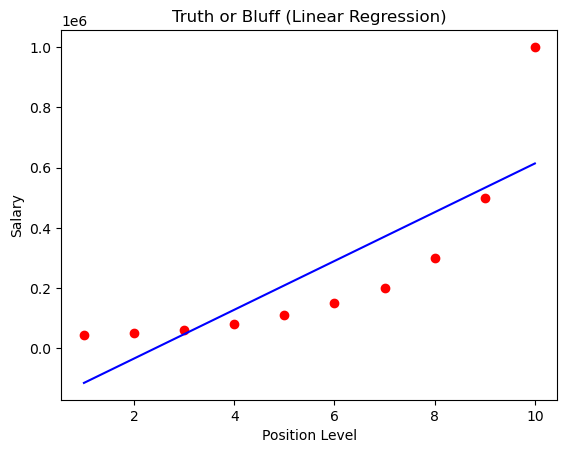

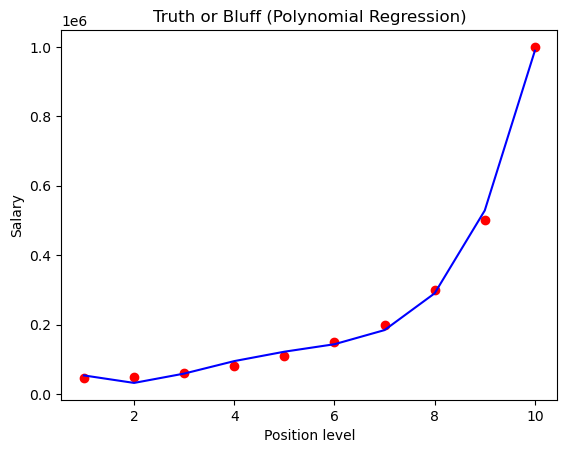

C:\Users\prabh\AppData\Local\Temp\ipykernel_23792\1833562146.py:59: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


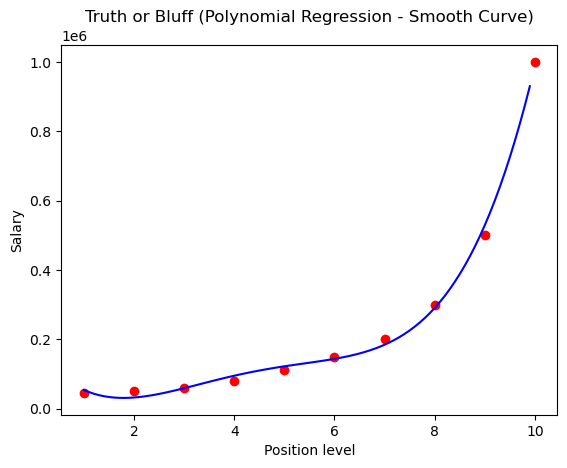

Linear Regression Prediction for Level 6.5: [330378.78787879]
Polynomial Regression Prediction for Level 6.5: [158862.45265157]


In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 

 
# Once mounted, navigate to the folder
# Example path (adjust based on your structure)
path = 'Position_Salaries.csv'
# Importing the dataset
dataset = pd.read_csv(path)
 
# Independent variable (Position Level)
X = dataset.iloc[:, 1:-1].values
 
# Dependent variable (Salary)
y = dataset.iloc[:, -1].values
 
# Display dataset preview
print("Dataset Preview:")
print(dataset.head())
 
 
# Training the Linear Regression model on the whole dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
 
# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
 
print("✅ Models Trained Successfully!")
 
 
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()
 
 
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
 
 
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression - Smooth Curve)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
 
 
# Predicting a new result with Linear Regression
linear_prediction = lin_reg.predict([[6.5]])
print("Linear Regression Prediction for Level 6.5:", linear_prediction)
 
 
# Predicting a new result with Polynomial Regression
poly_prediction = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
print("Polynomial Regression Prediction for Level 6.5:", poly_prediction)
 
 

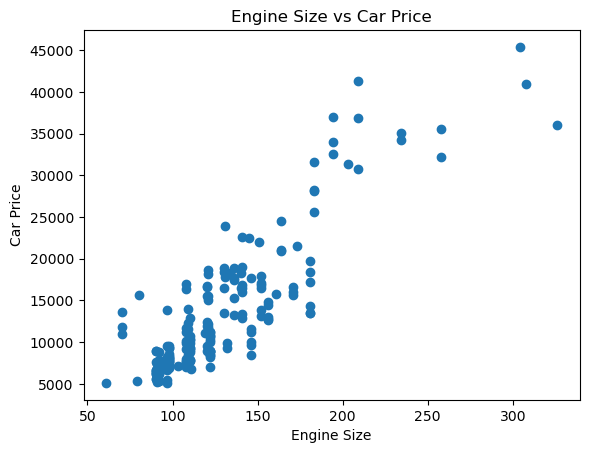

c:\Users\prabh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\prabh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\prabh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\prabh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\prabh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


1.0


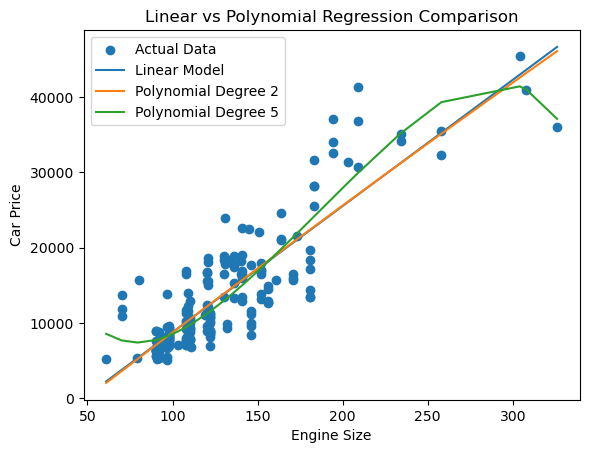

Prediction for Engine Size = 200
Linear Model Prediction: 25534.237747489227
Polynomial Degree 2 Prediction: 25591.791708947447
Polynomial Degree 5 Prediction: 27929.166260572834

Model Errors (Mean Squared Error)
Linear Model MSE: 14980261.40555132
Polynomial Degree 2 MSE: 14973637.600078518
Polynomial Degree 5 MSE: 13068145.693076948

Business Interpretation:
1. Linear model assumes price increases at a constant rate,
   which fails to capture slow-fast-slow growth in car pricing.
2. Polynomial degree 2 captures saturation and non-linear trends,
   giving more realistic pricing decisions.
3. Polynomial degree 5 is very flexible and fits noise,
   increasing the risk of overfitting and unstable future predictions.
4. Overly flexible models may cause incorrect pricing and revenue loss.


In [ ]:
# ============================================================
# Engine Size vs Car Price – Linear vs Polynomial Regression
# Full End-to-End Code
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# ------------------------------------------------------------
# 1. Load the dataset
# ------------------------------------------------------------
df = pd.read_csv("CarPrice_Assignment.csv")

# ------------------------------------------------------------
# 2. Identify relevant columns
# Input feature: Engine size
# Output variable: Car price
# ------------------------------------------------------------
X = df[["enginesize"]]
y = df["price"]

# ------------------------------------------------------------
# 3. Visualize the relationship between engine size and price
# ------------------------------------------------------------
plt.scatter(X, y)
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Engine Size vs Car Price")
plt.show()

# ------------------------------------------------------------
# 4. Simple Straight-Line Model (Linear Regression)
# ------------------------------------------------------------
linear_model = LinearRegression()
linear_model.fit(X, y)

y_pred_linear = linear_model.predict(X)
mse_linear = mean_squared_error(y, y_pred_linear)

# Predict price for engine size = 200
engine_200 = np.array([[200]])
price_linear_200 = linear_model.predict(engine_200)

# ------------------------------------------------------------
# 5. Curved Model (Polynomial Regression – Degree 2)
# ------------------------------------------------------------
poly2 = PolynomialFeatures(degree=2)
X_poly2 = poly2.fit_transform(X)

poly2_model = LinearRegression()
poly2_model.fit(X_poly2, y)

y_pred_poly2 = poly2_model.predict(X_poly2)
mse_poly2 = mean_squared_error(y, y_pred_poly2)

price_poly2_200 = poly2_model.predict(poly2.transform(engine_200))

# ------------------------------------------------------------
# 6. More Flexible Model (Polynomial Regression – Degree 5)
# ------------------------------------------------------------
poly5 = PolynomialFeatures(degree=5)
X_poly5 = poly5.fit_transform(X)

poly5_model = LinearRegression()
poly5_model.fit(X_poly5, y)

y_pred_poly5 = poly5_model.predict(X_poly5)
mse_poly5 = mean_squared_error(y, y_pred_poly5)




price_poly5_200 = poly5_model.predict(poly5.transform(engine_200))

# ------------------------------------------------------------
# 7. Plot comparison of models
# ------------------------------------------------------------
X_sorted = X.sort_values(by="enginesize")
X_sorted_np = X_sorted.values

plt.scatter(X, y, label="Actual Data")
plt.plot(X_sorted_np, linear_model.predict(X_sorted), label="Linear Model")
plt.plot(
    X_sorted_np,
    poly2_model.predict(poly2.transform(X_sorted_np)),
    label="Polynomial Degree 2"
)
plt.plot(
    X_sorted_np,
    poly5_model.predict(poly5.transform(X_sorted_np)),
    label="Polynomial Degree 5"
)

plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Linear vs Polynomial Regression Comparison")
plt.legend()
plt.show()

# ------------------------------------------------------------
# 8. Print prediction results and errors
# ------------------------------------------------------------
print("Prediction for Engine Size = 200")
print("Linear Model Prediction:", price_linear_200[0])
print("Polynomial Degree 2 Prediction:", price_poly2_200[0])
print("Polynomial Degree 5 Prediction:", price_poly5_200[0])

print("\nModel Errors (Mean Squared Error)")
print("Linear Model MSE:", mse_linear)
print("Polynomial Degree 2 MSE:", mse_poly2)
print("Polynomial Degree 5 MSE:", mse_poly5)

# ------------------------------------------------------------
# 9. Business Interpretation (Printed Explanation)
# ------------------------------------------------------------
print("\nBusiness Interpretation:")
print("1. Linear model assumes price increases at a constant rate,")
print("   which fails to capture slow-fast-slow growth in car pricing.")
print("2. Polynomial degree 2 captures saturation and non-linear trends,")
print("   giving more realistic pricing decisions.")
print("3. Polynomial degree 5 is very flexible and fits noise,")
print("   increasing the risk of overfitting and unstable future predictions.")
print("4. Overly flexible models may cause incorrect pricing and revenue loss.")


### Why does a straight-line model fail here?
It assumes a constant price increase for every engine size, which is unrealistic.  
Car prices grow slowly, then rapidly, and finally saturate as engine size increases.

### What risk occurs if the curve becomes too flexible?
An overly flexible curve fits noise instead of the real trend.  
This causes overfitting and poor predictions on new data.

### Which model would you recommend for production and why?
A polynomial regression model with degree 2 is recommended.  
It captures the non-linear trend while remaining stable and reliable.


In [8]:
m_score = poly5_model.score(X_poly5,y_pred_poly5)
print(m_score)

1.0


In [12]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

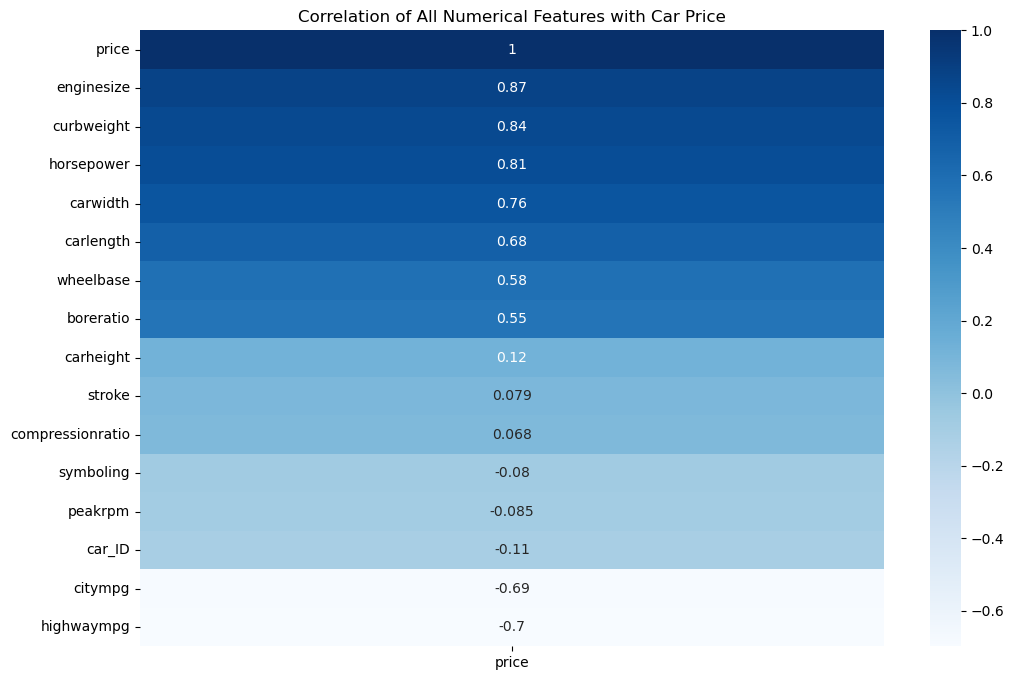

In [18]:
# ======================================
# Heatmap: All Columns w.r.t Target (price)
# ======================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("CarPrice_Assignment.csv")

# Select only numerical columns
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix[["price"]].sort_values(by="price", ascending=False),
    annot=True,cmap='Blues'
)
plt.title("Correlation of All Numerical Features with Car Price")
plt.show()


### Relationship of Each Numerical Column with Target (Price)

- **enginesize → Strong positive 0.87**  
  Larger engines significantly increase car price.

- **horsepower → Strong positive 0.84**  
  Higher power directly drives premium pricing.

- **curbweight → Strong positive 0.81**  
  Heavier cars usually indicate better build and luxury, increasing price.

- **carwidth → Moderate to strong positive 0.76**  
  Wider cars are often premium models, contributing to higher prices.

- **carlength → Moderate positive 0.68**  
  Longer cars tend to cost more, but length alone is not a dominant factor.

- **wheelbase → Moderate positive 0.58**  
  A longer wheelbase improves comfort and stability, moderately affecting price.

- **boreratio → Moderate positive 0.55**  
  Indicates engine performance efficiency, influencing price moderately.

- **stroke → Weak positive 0.12**  
  Has limited direct impact on pricing compared to other engine metrics.

- **compressionratio → Weak positive 0.079(unrelavant)**  
  Slight influence; not a major pricing determinant.

- **peakrpm → Weak positive 0.068(unrelavant)**  
  Engine RPM capability has minimal effect on overall car price.

- **citympg → Strong negative -0.08(unrelavant)**  
  Higher fuel efficiency is associated with economy cars and lower prices.

- **highwaympg → Strong negative -0.085(unrelavant)**  
  Similar to city mpg, higher mileage usually means lower-priced vehicles.

- **symboling → Weak negative -0.11**  
  Risk rating has little influence on car price.

- **height → Weak positive -0.7**  
  Vehicle height alone does not strongly affect pricing.

- **numofdoors → Weak positive -0.69**  
  Door count has minimal impact compared to performance features.

**Overall Business Insight:**  
Car price is **strongly driven by performance and engine-related features**, moderately influenced by vehicle dimensions, and **negatively related to fuel efficiency**, reflecting real-world automobile market behavior.


1. compressionratio
2. peakrpm
3. citympg
4. highwaympg

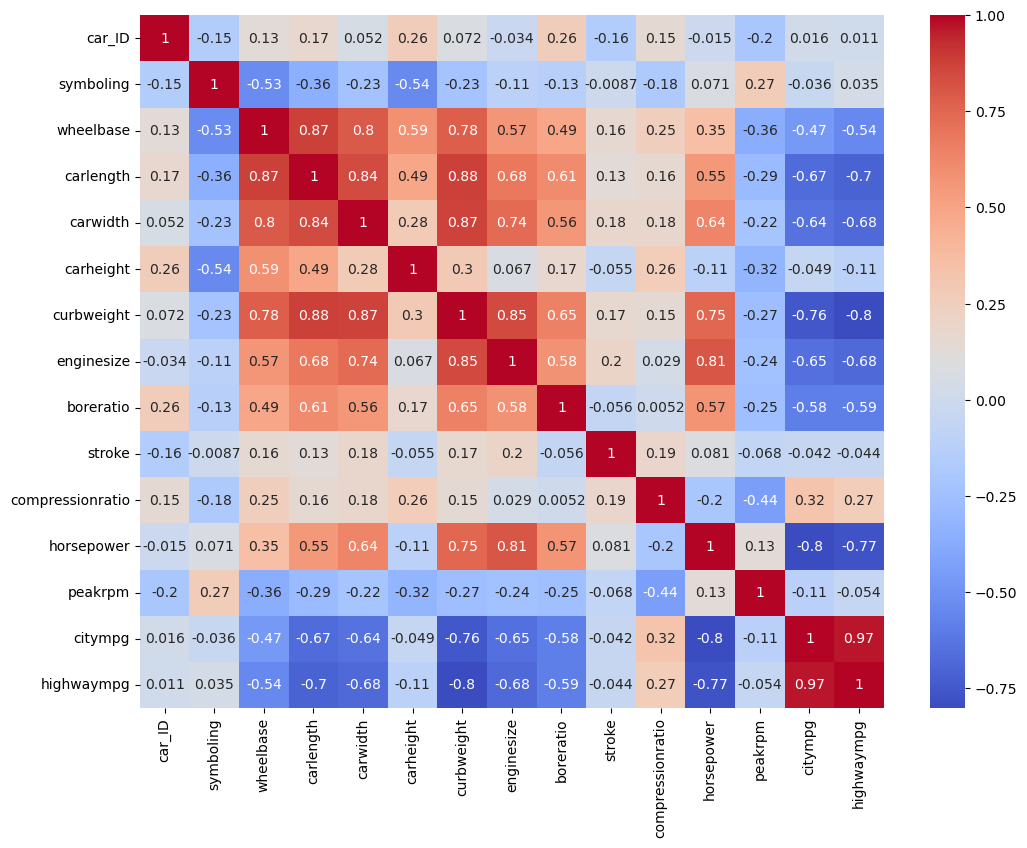

In [24]:
x=df.drop('price',axis=1)
 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
sns.heatmap(x.corr(numeric_only=True), annot=True,cmap='coolwarm')
plt.show()
 

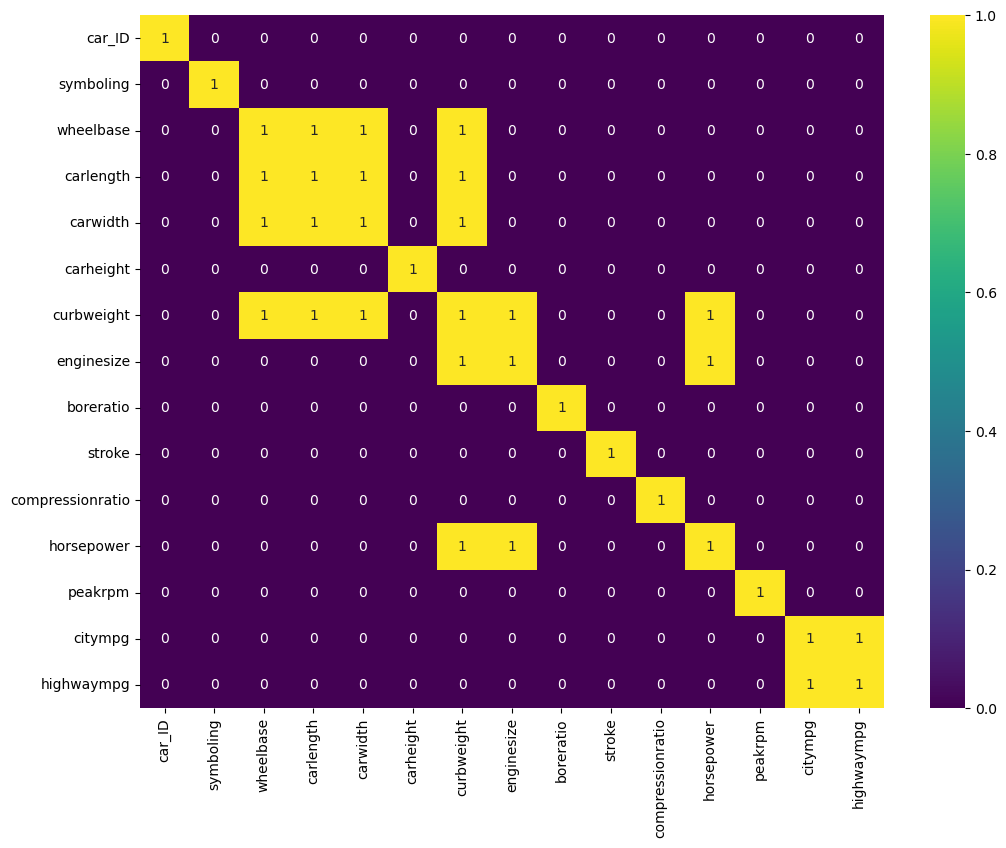

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
sns.heatmap(x.corr(numeric_only=True)>0.75, annot=True,cmap='viridis')
plt.show()


- **wheelbase ↔ carlength = 0.87**  
- **wheelbase ↔ carwidth = 0.80**  
- **carlength ↔ carwidth = 0.84**

- **curbweight ↔ wheelbase = 0.78**  
- **curbweight ↔ carlength = 0.88**  
- **curbweight ↔ carwidth = 0.87**

- **curbweight ↔ enginesize = 0.85**  
- **curbweight ↔ horsepower = 0.75**

- **enginesize ↔ horsepower = 0.81**

- **citympg ↔ highwaympg = 0.97**



In [31]:


numeric_df = df.select_dtypes(include=["int64", "float64"])

X_features = numeric_df.drop(columns=["price"], errors="ignore")

corr_matrix = X_features.corr()

high_corr_pairs = []
threshold = 0.75

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > threshold:
            high_corr_pairs.append(
                (corr_matrix.columns[i],
                 corr_matrix.columns[j],
                 round(corr_value, 2))
            )

# Convert to DataFrame for clean view
high_corr_df = pd.DataFrame(
    high_corr_pairs,
    columns=["Feature 1", "Feature 2", "Correlation Value"]
)

print(high_corr_df)


     Feature 1   Feature 2  Correlation Value
0    carlength   wheelbase               0.87
1     carwidth   wheelbase               0.80
2     carwidth   carlength               0.84
3   curbweight   wheelbase               0.78
4   curbweight   carlength               0.88
5   curbweight    carwidth               0.87
6   enginesize  curbweight               0.85
7   horsepower  curbweight               0.75
8   horsepower  enginesize               0.81
9      citympg  curbweight              -0.76
10     citympg  horsepower              -0.80
11  highwaympg  curbweight              -0.80
12  highwaympg  horsepower              -0.77
13  highwaympg     citympg               0.97


In [34]:
unique_columns_from_pairs = pd.unique(
    high_corr_df[["Feature 1", "Feature 2"]].values.ravel()
)

print("Unique column names from highly correlated pairs:")
print(list(unique_columns_from_pairs))

Unique column names from highly correlated pairs:
['carlength', 'wheelbase', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg']


1. compressionratio
2. peakrpm
3. citympg
4. highwaympg

- **carlength → +0.68**
- **wheelbase → +0.57**
- **carwidth → +0.74**
- **curbweight → +0.84**
- **enginesize → +0.87**
- **horsepower → +0.81**
- **citympg → −0.69**
- **highwaympg → −0.70**


In [40]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load dataset
df = pd.read_csv("CarPrice_Assignment.csv")
# Drop specified columns
cols_to_remove = [
    "compressionratio",
    "peakrpm",
    "citympg",
    "highwaympg",
    "wheelbase",
    "carlength"
]
df = df.drop(columns=cols_to_remove, errors="ignore")

numeric_df = df.select_dtypes(include=["int64", "float64"])

X = numeric_df.drop(columns=["price"])
y = numeric_df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# R² Scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("R² Score (Train):", round(r2_train, 3))
print("R² Score (Test):", round(r2_test, 3))


R² Score (Train): 0.843
R² Score (Test): 0.853


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

# ------------------------------------------------
# 1. Load dataset
# ------------------------------------------------
df = pd.read_csv("CarPrice_Assignment.csv")

# Drop specified columns
cols_to_remove = [
    "compressionratio",
    "peakrpm",
    "citympg",
    "highwaympg",
    "wheelbase",
    "carlength"
]
df = df.drop(columns=cols_to_remove, errors="ignore")

# Use only numerical columns
numeric_df = df.select_dtypes(include=["int64", "float64"])

X = numeric_df.drop(columns=["price"])
y = numeric_df["price"]

# ------------------------------------------------
# 2. Train-test split
# ------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------------------------
# 3. Feature Scaling (needed for Ridge & Lasso)
# ------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------------------------------
# 4. Linear Regression
# ------------------------------------------------
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

lr_train_pred = lr.predict(X_train_scaled)
lr_test_pred = lr.predict(X_test_scaled)

lr_r2_train = r2_score(y_train, lr_train_pred)
lr_r2_test = r2_score(y_test, lr_test_pred)

# ------------------------------------------------
# 5. Ridge Regression
# ------------------------------------------------
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

ridge_train_pred = ridge.predict(X_train_scaled)
ridge_test_pred = ridge.predict(X_test_scaled)

ridge_r2_train = r2_score(y_train, ridge_train_pred)
ridge_r2_test = r2_score(y_test, ridge_test_pred)

# ------------------------------------------------
# 6. Lasso Regression
# ------------------------------------------------
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)

lasso_train_pred = lasso.predict(X_train_scaled)
lasso_test_pred = lasso.predict(X_test_scaled)

lasso_r2_train = r2_score(y_train, lasso_train_pred)
lasso_r2_test = r2_score(y_test, lasso_test_pred)

# ------------------------------------------------
# 7. Results
# ------------------------------------------------
print("R² Scores Comparison\n")

print("Linear Regression:")
print("Train R²:", round(lr_r2_train, 3))
print("Test  R²:", round(lr_r2_test, 3), "\n")

print("Ridge Regression:")
print("Train R²:", round(ridge_r2_train, 3))
print("Test  R²:", round(ridge_r2_test, 3), "\n")

print("Lasso Regression:")
print("Train R²:", round(lasso_r2_train, 3))
print("Test  R²:", round(lasso_r2_test, 3), "\n")

# ------------------------------------------------
# 8. Lasso Feature Selection
# ------------------------------------------------
lasso_coeffs = pd.Series(lasso.coef_, index=X.columns)
print("Lasso Selected Features (Non-zero coefficients):")
print(lasso_coeffs[lasso_coeffs != 0])


R² Scores Comparison

Linear Regression:
Train R²: 0.843
Test  R²: 0.853 

Ridge Regression:
Train R²: 0.843
Test  R²: 0.852 

Lasso Regression:
Train R²: 0.843
Test  R²: 0.853 

Lasso Selected Features (Non-zero coefficients):
car_ID        -870.498776
symboling      445.515598
carwidth      1349.833749
carheight      662.366512
curbweight     983.598727
enginesize    3389.385833
boreratio      -37.567700
stroke        -797.130319
horsepower    2128.753146
dtype: float64


In [46]:
from sklearn.linear_model import RidgeCV
import numpy as np
model=RidgeCV(alphas=alphas)
alphas=np.arange(0.1,10,0.05)
model.fit(X_train, y_train)
print("Best alpha:", model.alpha_)
print("best score: ",model.score(X_test,y_test))

Best alpha: 9.950000000000003
best score:  0.8505906165825029


In [49]:
from sklearn.linear_model import LassoCV
import numpy as np
model=LassoCV(alphas=alphas)
alphas=np.arange(0.1,10,0.05)
model.fit(X_train, y_train)
print("Best alpha:", model.alpha_)
print("best score: ",model.score(X_test,y_test))

Best alpha: 9.950000000000003
best score:  0.8523277972620783
